<a href="https://colab.research.google.com/github/AJ-AYUSHMAN/CodSoft-Internship-Project_2/blob/main/MOVIE_RATING_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully!
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana

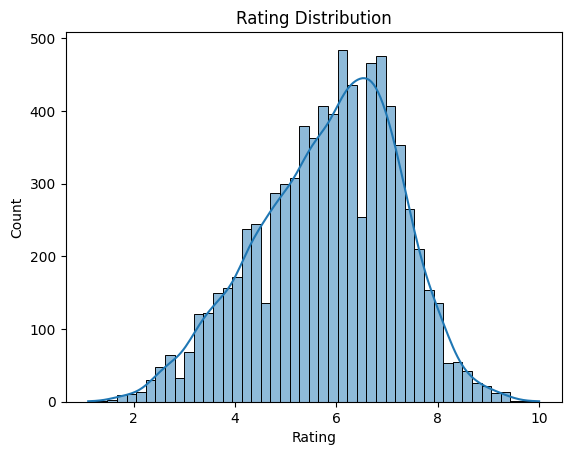

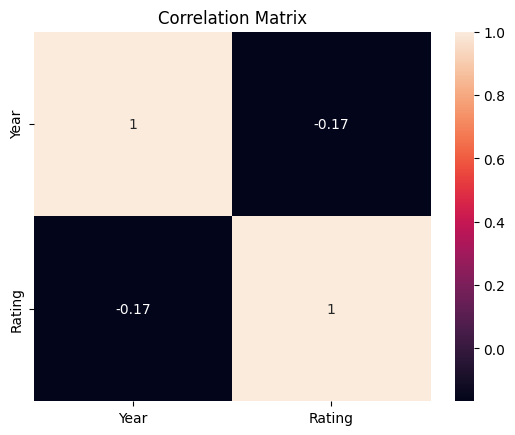

Series([], dtype: int64)
Train MSE: 0.11238971117300466
Test MSE: 0.8165331061612537
Train R2: 0.885045684289453
Test R2: 0.15163397219865904
Predictions on test data:
[5.84162142 5.15939449 5.84162142 ... 5.84162142 5.42716214 5.84162142]
       Actual Rating  Predicted Rating
11115       5.841621          5.841621
2921        6.800000          5.159394
3463        5.841621          5.841621
2495        5.841621          5.661967
15263       5.841621          5.841621
...              ...               ...
6434        5.100000          5.598394
14615       8.200000          5.841621
12250       5.841621          5.841621
4139        4.300000          5.427162
4679        5.841621          5.841621

[3102 rows x 2 columns]


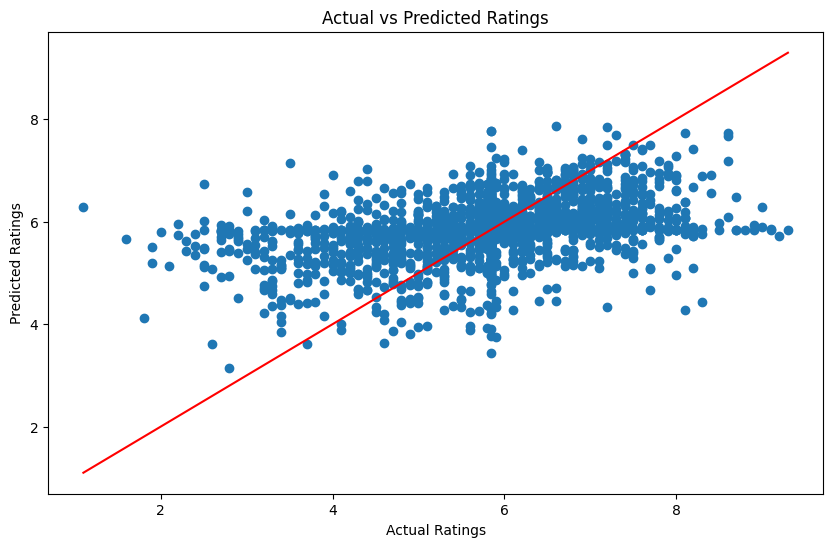

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/movieslist.csv'
try:
    data = pd.read_csv(file_path, encoding='utf-8')  # Try UTF-8 first
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin-1')  # Try Latin-1 if UTF-8 fails

print("Dataset loaded successfully!")
print(data.head())

# Display the column names
print("Columns in the dataset:", data.columns)

# Check for missing values
print(data.isnull().sum())

# Display summary statistics
print(data.describe())

# Extract the year from the 'Year' column and correct the format
data['Year'] = data['Year'].str.extract('(\d{4})').astype(float)
data['Year'] = data['Year'].fillna(0).astype(int)

# Check if 'Rating' column exists and handle accordingly
if 'Rating' in data.columns:
    # Visualize the distribution of movie ratings
    sns.histplot(data['Rating'], kde=True)
    plt.title('Rating Distribution')
    plt.show()
else:
    print("Warning: 'Rating' column not found in the dataset.")

# Correlation heatmap
# Drop non-numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Handle missing values
# Fill numeric columns with mean
for column in numeric_data.columns:
    data[column].fillna(data[column].mean(), inplace=True)

# Fill categorical columns with mode
categorical_columns = data.select_dtypes(include=[object]).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Display columns with missing values if any
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Feature engineering and selection
# Assuming 'Genre', 'Director', 'Actor 1' are categorical and 'Rating' is the target variable
# Adjust these names based on the actual column names in your dataset
if 'Rating' in data.columns:
    X = data[['Genre', 'Director', 'Actor 1', 'Year']]
    y = data['Rating']
else:
    print("Error: 'Rating' column not found, cannot proceed with model training.")
    exit()

# One-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director', 'Actor 1'])
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')

# Predict on test data
predictions = model.predict(X_test)
print("Predictions on test data:")
print(predictions)

# Compare with actual ratings
comparison_df = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': predictions})
print(comparison_df)

# Plot actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()
